In [1]:
using CSV
using DataFrames

In [2]:
data = CSV.read("covid_data.csv", DataFrame)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [3]:
rename!(data, 1=>"province", 2=>"country")

,province,country,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [4]:
all_countries = data[:, 2]

275-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [6]:
# function to check how the country of interest is spelled in the dataset from the first letter of the country name
function find_country(a)
    conts = [startswith(country, a) for country in all_countries]
    return conts
end

find_country (generic function with 1 method)

In [7]:
data[find_country("I"), 2]

8-element Vector{String}:
 "Iceland"
 "India"
 "Indonesia"
 "Iran"
 "Iraq"
 "Ireland"
 "Israel"
 "Italy"

In [8]:
# vector of all the countries of interest
countries = ["US", "India", "China", "Germany", "Japan", "United Kingdom", "France"]

7-element Vector{String}:
 "US"
 "India"
 "China"
 "Germany"
 "Japan"
 "United Kingdom"
 "France"

In [9]:
sort!(countries)

7-element Vector{String}:
 "China"
 "France"
 "Germany"
 "India"
 "Japan"
 "US"
 "United Kingdom"

In [10]:
# number of days of the data in the dataset
num_days = length(data[1, 5:end])

486

In [11]:
# Data that we are going to plot
# initializing with zeros so that the type isn't Vector{Any}
pl_data = [zeros(num_days)]

1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### Now we need to add the data of each country from various territories into one row of our vector of vectors. Each country that we're gonna plot gets a vector inside the vector pl_data

In [12]:
for i in 1:length(countries)
    acc = zeros(num_days)
    k = findall(all_countries .== countries[i])  #list of all the indices of the current country in data
    
    for j in k
        temp = collect(data[i, 5:end]) + acc
        acc, temp = temp, acc
    end
    if i==1
        pl_data[i]+=acc
    else
        push!(pl_data, acc)
    end
end

In [13]:
pl_data

7-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.132412e6, 2.14353e6, 2.15407e6, 2.156008e6, 2.158456e6, 2.162332e6, 2.169846e6, 2.180148e6, 2.19555e6, 2.21272e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.58214e6, 1.58268e6, 1.583268e6, 1.583736e6, 1.58418e6, 1.584384e6, 1.584852e6, 1.58514e6, 1.585416e6, 1.585836e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  124682.0, 124889.0, 125059.0, 125194.0, 125311.0, 125485.0, 125693.0, 125896.0, 126156.0, 126434.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  13470.0, 13470.0, 13510.0, 13510.0, 13510.0, 13555.0, 13569.0, 13569.0, 13569.0, 13569.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  29405.0, 29695.0, 30030.0, 30354.0, 30637.0, 30787.0, 31045.0, 31438.0, 31661.0, 31909.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1240.0, 1240.0, 1240.0, 1241.0, 1241.0, 1251.0, 1251.0, 1252.0, 1255.0, 1255.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [14]:
#creating a copy of pl_data
# pl will be used to replace the 0's with NaN for our plots, while pl_data will be processed more as we draw a different type of plot

pl=[zeros(num_days)]


1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [16]:
#Now we have to replace the 0s with NaN to plot them in log scale later

for i in 1:length(pl_data)
    if i==1
        pl[i]+=pl_data[i]
        replace!(pl[i], 0=>NaN)
    else
        push!(pl ,replace(pl_data[i], 0 => NaN))
    end
end
pl_data ## will be unchanged

7-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.132412e6, 2.14353e6, 2.15407e6, 2.156008e6, 2.158456e6, 2.162332e6, 2.169846e6, 2.180148e6, 2.19555e6, 2.21272e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.58214e6, 1.58268e6, 1.583268e6, 1.583736e6, 1.58418e6, 1.584384e6, 1.584852e6, 1.58514e6, 1.585416e6, 1.585836e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  124682.0, 124889.0, 125059.0, 125194.0, 125311.0, 125485.0, 125693.0, 125896.0, 126156.0, 126434.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  13470.0, 13470.0, 13510.0, 13510.0, 13510.0, 13555.0, 13569.0, 13569.0, 13569.0, 13569.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  29405.0, 29695.0, 30030.0, 30354.0, 30637.0, 30787.0, 31045.0, 31438.0, 31661.0, 31909.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1240.0, 1240.0, 1240.0, 1241.0, 1241.0, 1251.0, 1251.0, 1252.0, 1255.0, 1255.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [17]:
pl # 0's replaced with NaN

13-element Vector{Vector{Float64}}:
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  4.264824e6, 4.28706e6, 4.30814e6, 4.312016e6, 4.316912e6, 4.324664e6, 4.339692e6, 4.360296e6, 4.3911e6, 4.42544e6]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  1.58214e6, 1.58268e6, 1.583268e6, 1.583736e6, 1.58418e6, 1.584384e6, 1.584852e6, 1.58514e6, 1.585416e6, 1.585836e6]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  124682.0, 124889.0, 125059.0, 125194.0, 125311.0, 125485.0, 125693.0, 125896.0, 126156.0, 126434.0]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  13470.0, 13470.0, 13510.0, 13510.0, 13510.0, 13555.0, 13569.0, 13569.0, 13569.0, 13569.0]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  29405.0, 29695.0, 30030.0, 30354.0, 30637.0, 30787.0, 31045.0, 31438.0, 31661.0, 31909.0]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  1240.0, 1240.0, 1240.0, 1241.0, 1241.0, 1251.0, 1251.0, 1252.0, 1255.0, 1255.0]
 [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, N

In [18]:
using Plots

### Now we plot the data for all the countries in one plot with a Linear Yscale

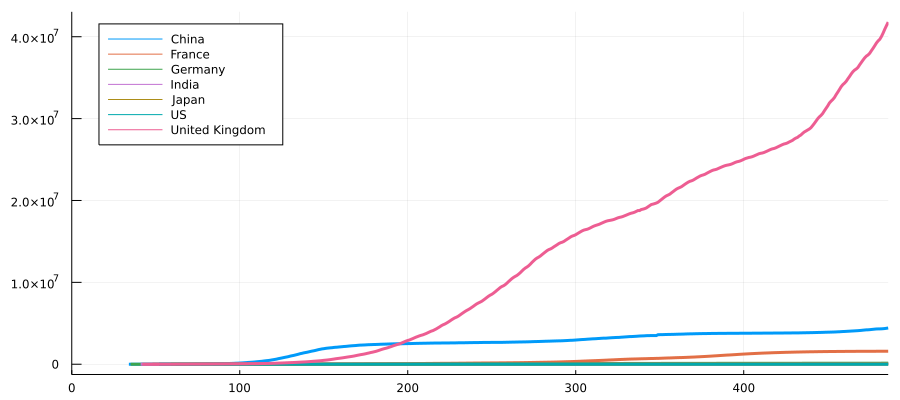

In [19]:
p = plot(size=(900, 400), xlim=(0, num_days))
for i in 1:length(countries)
    plot!(pl[i], label=countries[i], lw=3, leg=:topleft)
end
p

### Now the Log Scale

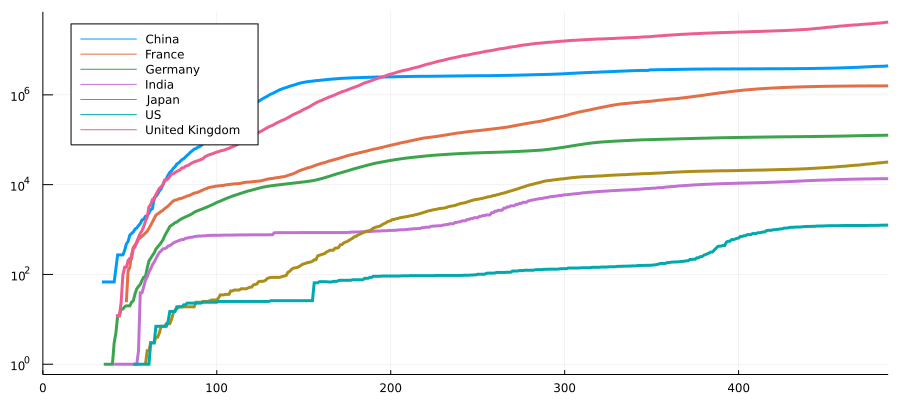

In [20]:
p = plot(size=(900, 400), xlim=(0, num_days))
for i in 1:length(countries)
    plot!(pl[i], lw=3, leg=:topleft, label=countries[i], yscale=:log10)
end
p

In [21]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6981226781326500390\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-902403587071877423\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6981226781326500390\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

### Now we will draw an interactive plot for the data with a log scale on Y axis

In [22]:
function interactive_plot(day_no)
    p = plot(legend=:bottomright, title="Covid Trend", xlim=(0, num_days))
    
    for i in 1:length(countries)
        plot!(pl[i][1:day_no], label=countries[i], m=:o, yscale=:log10)
    end
    return p
end 

interactive_plot (generic function with 1 method)

In [23]:
@manipulate for i in 1:num_days
    interactive_plot(i)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 486, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
243, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000188d2bd0, Task (runnable) @0x00000000188d2bd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"

### Now we can plot number of cases in the previous week(Y) vs total cases upto the current day in interactive plot

In [25]:
# Vector for storing no. of cases in each country in the previous week
weekly=[zeros(num_days)]

1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [26]:
for i in 1:length(countries)
    acc = zeros(num_days)
    for j in 7:num_days
        acc[j] = sum(pl_data[i][(j-6):j])
    end
    if i==1
        weekly[i] += acc
    else
        push!(weekly, acc)
    end
end
weekly

7-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.4735532e7, 1.4799554e7, 1.4864154e7, 1.4920492e7, 1.497632e7, 1.502851e7, 1.5076654e7, 1.512439e7, 1.517641e7, 1.523506e7]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.1062524e7, 1.1067084e7, 1.1071428e7, 1.1075172e7, 1.1078676e7, 1.1082024e7, 1.108524e7, 1.108824e7, 1.1090976e7, 1.1093544e7]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  868622.0, 870038.0, 871405.0, 872699.0, 873906.0, 875103.0, 876313.0, 877527.0, 878794.0, 880169.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  93928.0, 94035.0, 94155.0, 94259.0, 94346.0, 94472.0, 94594.0, 94693.0, 94792.0, 94851.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  200765.0, 202539.0, 204368.0, 206245.0, 208142.0, 210054.0, 211953.0, 213986.0, 215952.0, 217831.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  8642.0, 8650.0, 8658.0, 8667.0, 8677.0, 8691.0, 8704.0, 8716.0, 8731.0, 8746.0]
 [0.0, 0.0, 

In [27]:
# Taking Cumulative sum of the cases upto the previous day
for i in 1:length(countries)
    pl_data[i] = cumsum(pl_data[i])
end
pl_data

7-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  5.4101514e8, 5.4315867e8, 5.4531274e8, 5.47468748e8, 5.49627204e8, 5.51789536e8, 5.53959382e8, 5.5613953e8, 5.5833508e8, 5.605478e8]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.10271908e8, 2.11854588e8, 2.13437856e8, 2.15021592e8, 2.16605772e8, 2.18190156e8, 2.19775008e8, 2.21360148e8, 2.22945564e8, 2.245314e8]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.5534036e7, 2.5658925e7, 2.5783984e7, 2.5909178e7, 2.6034489e7, 2.6159974e7, 2.6285667e7, 2.6411563e7, 2.6537719e7, 2.6664153e7]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.148861e6, 2.162331e6, 2.175841e6, 2.189351e6, 2.202861e6, 2.216416e6, 2.229985e6, 2.243554e6, 2.257123e6, 2.270692e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  4.222092e6, 4.251787e6, 4.281817e6, 4.312171e6, 4.342808e6, 4.373595e6, 4.40464e6, 4.436078e6, 4.467739e6, 4.499648e6]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [28]:
# Replacing 0's with NaN for log scale
for i in 1:length(countries)
    replace!(pl_data[i], 0=>NaN)
    replace!(weekly[i], 0=>NaN)
end

### Static plot for weekly vs pl_data

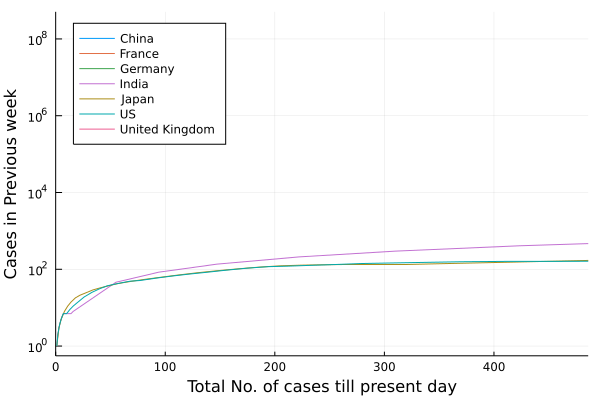

In [29]:
p = plot(xlim=(0, num_days))
for i in 1:length(countries)
    plot!(pl_data[i], weekly[i], leg=:topleft, label=countries[i], yscale=:log10)
end
xlabel!("Total No. of cases till present day")
ylabel!("Cases in Previous week")
p

In [42]:
@manipulate for i in 1:num_days
    p = plot(xlim=(0,num_days), ylim=(10^0, 10^3), title="Covid Trends", leg=:bottomright)
    
    for j in 1:length(countries)
        plot!(pl_data[j][1:i], weekly[j][1:i], lw=2, label=countries[j], yscale=:log10)
    end
    
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 486, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
243, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001b69bb70, Task (runnable) @0x000000001b69bb70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"

In [40]:
@manipulate for i in 1:num_days
    p = plot(xlim=(0,num_days), ylim=(10^0, 10^3), title="Covid Trends", leg=:bottomright)
    
    for j in 1:length(countries)
        plot!(pl_data[j][1:i], weekly[j][1:i], lw=2, label=countries[j], yscale=:log10)
        scatter!(pl_data[j][1:i], weekly[j][1:i], m=:o, label=false)
        annotate!(pl_data[j][i], weekly[j][i], text(countries[j], 10, :black))
    end
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 486, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
243, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000018665f50, Task (runnable) @0x0000000018665f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"